<a href="https://colab.research.google.com/github/rajagopalmotivate/try1/blob/master/DCGAN_for_odd_sized_images_ver22_DataVar1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dual Generator learns to pair images to different datasets

In [0]:
from IPython.display import Image
from keras.utils import plot_model
# Install dependencies
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

In [0]:
!pip install pydot pydot-ng


In [0]:
from IPython.display import Image
from keras.utils import plot_model

In [0]:
# Restart runtime to allow Jupyter to know the changes above
import os
#os._exit(0)

In [0]:
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate, Average, merge
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Model
from keras.optimizers import Adam
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from google.colab import files
import copy 

In [0]:
def load_large_data():
    (X_train1, ytrain1), (_, _) = mnist.load_data()
    (X_train2, ytrain2), (_, _) = fashion_mnist.load_data()
    
    X_trainlarge = np.zeros([100000,28,56],dtype=np.uint8)
    
    for i in range(0, 100):
      for j in range(0, 1000):    
          aimage1 = X_train2[i]
          aimage2 = X_train2[j]
          largeimage =  np.zeros([28,56],dtype=np.uint8)
          largeimage[0:28, 0:56] = 40
          largeimage[0:28, 0:28] = aimage1
          largeimage[0:28, 28:56] = aimage1
          X_trainlarge[i*1000 + j] = largeimage
 
    
    fig=plt.figure(figsize=(16, 16))
    for i in range(0, 10):
      for j in range(0, 10):
          fig.add_subplot(10, 10, i*10 + j +1)
          plt.imshow(X_trainlarge[i*100 + j + 600])
  ##plt.show()
    
    print(X_train2.shape)
    print(X_trainlarge.shape)
    
    plt.imshow(aimage1)
    plt.show()  
 
    plt.imshow(aimage2)
    plt.show()
    
    plt.imshow(largeimage, interpolation='none')
    plt.show()
    

    X_trainlarge = (X_trainlarge.astype(np.float32) - 127.5) / 127.5
    X_trainlarge = np.expand_dims(X_trainlarge, axis=3)


    return X_trainlarge

In [0]:
def load_large_dataPaired():
    
    (X_train1, ytrain1), (_, _) = mnist.load_data()
   # (X_train1, ytrain1), (_, _) = fashion_mnist.load_data()

    (X_train2, ytrain2), (_, _) = fashion_mnist.load_data()
    
    X_train1label0 = np.zeros([10000,28,28],dtype=np.uint8)
    X_train1label1 = np.zeros([10000,28,28],dtype=np.uint8)
    X_train1label2 = np.zeros([10000,28,28],dtype=np.uint8)
    X_train1label3 = np.zeros([10000,28,28],dtype=np.uint8)   
    count0 = 0 
    count1 = 1
    count2 = 2 
    count3 = 3
    for i in range(0, 50000):
      if(ytrain1[i]==0):
        X_train1label0[count0] = X_train1[i]
        count0 = count0 +1 
      if(ytrain1[i]==1):
        X_train1label1[count1] = X_train1[i]
        count1 = count1 +1
      if(ytrain1[i]==2):
        X_train1label2[count2] = X_train1[i]
        count2 = count2 +1
      if(ytrain1[i]==3):
        X_train1label3[count3] = X_train1[i]
        count3 = count3 +1
        
        
    X_train2label0 = np.zeros([10000,28,28],dtype=np.uint8)
    X_train2label1 = np.zeros([10000,28,28],dtype=np.uint8)
    X_train2label2 = np.zeros([10000,28,28],dtype=np.uint8)
    X_train2label3 = np.zeros([10000,28,28],dtype=np.uint8)   
    count0 = 0 
    count1 = 1
    count2 = 2 
    count3 = 3
    for i in range(0, 50000):
      if(ytrain2[i]==0):
        X_train2label0[count0] = X_train2[i]
        count0 = count0 +1 
      if(ytrain2[i]==1):
        X_train2label1[count1] = X_train2[i]
        count1 = count1 +1
      if(ytrain2[i]==2):
        X_train2label2[count2] = X_train2[i]
        count2 = count2 +1
      if(ytrain2[i]==3):
        X_train2label3[count3] = X_train2[i]
        count3 = count3 +1        
        
    
    totalsamples = 50000
    X_trainlarge = np.zeros([50000,28,56],dtype=np.uint8)
    
    fillount = 0
    for i in range(0, 10000): 
          if( (fillount + 3) > totalsamples  ):
            break
          aimage1 = X_train1label0[i]
          aimage2 = X_train2label1[i]
          largeimage =  np.zeros([28,56],dtype=np.uint8)
          largeimage[0:28, 0:56] = 40
          largeimage[0:28, 0:28] = aimage1
          largeimage[0:28, 28:56] = aimage2
          X_trainlarge[fillount] = largeimage
          fillount = fillount + 1
          aimage1 = X_train1label1[i]
          aimage2 = X_train2label2[i]
          largeimage =  np.zeros([28,56],dtype=np.uint8)
          largeimage[0:28, 0:56] = 40
          largeimage[0:28, 0:28] = aimage1
          largeimage[0:28, 28:56] = aimage2
          X_trainlarge[fillount] = largeimage
          fillount = fillount + 1          
          aimage1 = X_train1label2[i]
          aimage2 = X_train2label3[i]
          largeimage =  np.zeros([28,56],dtype=np.uint8)
          largeimage[0:28, 0:56] = 40
          largeimage[0:28, 0:28] = aimage1
          largeimage[0:28, 28:56] = aimage2
          X_trainlarge[fillount] = largeimage
          fillount = fillount + 1 
    
    fig=plt.figure(figsize=(16, 16))
    for i in range(0, 10):
      for j in range(0, 10):
          fig.add_subplot(10, 10, i*10 + j +1)
          plt.imshow(X_trainlarge[i*10 + j + 14700])
  ##plt.show()
    
    print(X_train2.shape)
    print(X_trainlarge.shape)

    

    X_trainlarge = (X_trainlarge.astype(np.float32) - 127.5) / 127.5
    X_trainlarge = np.expand_dims(X_trainlarge, axis=3)


    return X_trainlarge

In [0]:
def load_large_data5656():
    (X_train1, _), (_, _) = mnist.load_data()
    (X_train2, _), (_, _) = fashion_mnist.load_data()
    
    X_trainlarge = np.zeros([10000,56,56],dtype=np.uint8)
    
    for i in range(0, 100):
      for j in range(0, 100):    
          aimage1 = X_train2[i]
          aimage2 = X_train2[j]
          largeimage =  np.zeros([56,56],dtype=np.uint8)
          largeimage[0:28, 0:56] = 40
          largeimage[0:28, 0:28] = aimage2
          largeimage[0:28, 28:56] = aimage1
          X_trainlarge[i*100 + j] = largeimage
 
    
    fig=plt.figure(figsize=(16, 16))
    for i in range(0, 10):
      for j in range(0, 10):
          fig.add_subplot(10, 10, i*10 + j +1)
          plt.imshow(X_trainlarge[i*100 + j + 1000])
  ##plt.show()
    
    print(X_train2.shape)
    print(X_trainlarge.shape)
    
    plt.imshow(aimage1)
    plt.show()  
 
    plt.imshow(aimage2)
    plt.show()
    
    plt.imshow(largeimage, interpolation='none')
    plt.show()
    

    X_trainlarge = (X_trainlarge.astype(np.float32) - 127.5) / 127.5
    X_trainlarge = np.expand_dims(X_trainlarge, axis=3)


    return X_trainlarge

In [0]:
X_trainlarge = load_large_data()

In [0]:
#X_trainlarge5656 = load_large_data5656()

In [0]:
X_trainlargepaired = load_large_dataPaired()

In [0]:
def load_databydatasetname(datasetname):
  if (datasetname == 1):   
    (X_train, _), (_, _) = mnist.load_data()
  if (datasetname == 2):   
    (X_train, _), (_, _) = fashion_mnist.load_data()
  if (datasetname == 3):   
     X_train = X_trainlarge
  if (datasetname == 4):   
     X_train = X_trainlarge5656
  if (datasetname == 5):   
     X_train = X_trainlargepaired
      
  X_train = (X_train.astype(np.float32) - 127.5) / 127.5
  X_train = np.expand_dims(X_train, axis=3)
  return X_train
  

In [0]:
def build_discriminator(img_shape):
    input = Input(img_shape)
    x =Conv2D(32, kernel_size=3, strides=2, padding="same")(input)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = Conv2D(64, kernel_size=3, strides=2, padding="same")(x)
    x = ZeroPadding2D(padding=((0, 1), (0, 1)))(x)
    x = (LeakyReLU(alpha=0.2))(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(128, kernel_size=3, strides=2, padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(256, kernel_size=3, strides=1, padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    out = Dense(1, activation='sigmoid')(x)

    model = Model(input, out)
  #  print("-- Discriminator -- ")
   # model.summary()
    return model

In [0]:
def save_imgs(generator, epoch, batch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    gen_imgs = generator.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    ##fig.savefig("images/mnist_%d_%d.png" % (epoch, batch))
    plt.show()
    plt.close()

In [0]:
def save_imgs_all(generator1, generator2, generator3, epoch, batch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    gen_imgs = generator1.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    ##fig.savefig("images/mnist_%d_%d.png" % (epoch, batch))
    plt.show()
    plt.close()
    
    gen_imgs = generator2.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.show()
    plt.close()
    
    gen_imgs = generator3.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.show()
    plt.close()

In [0]:


def plotamodel(amodel, showdetails=True):
  # Model summary
  print(amodel.summary())

  if (showdetails==True):
    # Plot model graph
    plot_model(amodel, show_shapes=True, show_layer_names=True, to_file='model.png')
    #Image(retina=True, filename='model.png')
  if (showdetails==False):
    # Plot model graph
    plot_model(amodel, show_shapes=False, show_layer_names=False, to_file='modelsmall.png')
   # Image(retina=True, filename='modelsmall.png')

In [0]:
def build_combined_model():

    discriminatormymodel = build_classifier_model

    generatormymodel = build_generator_model()
   
    optimizer1 = Adam(lr=0.0002, beta_1=0.5)


    z = Input(shape=(100,))
    img = generatormymodel(z)
    discriminatormymodel.trainable = False
    real = discriminatormymodel(img)
    
    combined = Model(z, real)
    
    combined.compile(loss='binary_crossentropy', optimizer=optimizer1)
    return combined

In [0]:
def getlastlayer(amodel):
  for layer in amodel.layers:
    layerlast = layer
  print(layer)
  print(layer.get_config())
  print(layer.input)
  print(layer.input_shape)
  print(layer.output)
  print('output shape of last is ')
  print(layer.output_shape)
  return layer

In [0]:
def build_modelsNandriNEW(averagemode = 1, loadpretrainedweights=False):
    z = Input(shape=(100,))
    inputz = z
    x = Dense(128 * 7 * 7, activation="relu")(inputz)
    x = Reshape((7, 7, 128))(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = UpSampling2D()(x)
    x = Conv2D(128, kernel_size=3, padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = UpSampling2D()(x)
    x = Conv2D(64, kernel_size=3, padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(1, kernel_size=3, padding="same")(x)
    out = Activation("tanh")(x)    
    generator1 = Model(inputz, out)
    
    inputz2 = z
    x1 = Dense(128 * 7 * 7, activation="relu")(inputz2)
    x1 = Reshape((7, 7, 128))(x1)
    x1 = BatchNormalization(momentum=0.8)(x1)
    x1 = UpSampling2D()(x1)
    x1 = Conv2D(128, kernel_size=3, padding="same")(x1)
    x1 = Activation("relu")(x1)
    x1 = BatchNormalization(momentum=0.8)(x1)
    x1 = UpSampling2D()(x1)
    x1 = Conv2D(64, kernel_size=3, padding="same")(x1)
    x1 = Activation("relu")(x1)
    x1 = BatchNormalization(momentum=0.8)(x1)
    x1 = Conv2D(1, kernel_size=3, padding="same")(x1)
    out1 = Activation("tanh")(x1)    
    generator2 = Model(inputz2, out1)
    
    
    img1 = generator1(z)
    img2 = generator2(z)
    
    
    aoptimizer = Adam(lr=0.0002, beta_1=0.5)   
    discriminator = build_discriminator(img_shape=(28, 56, 1))
    discriminator.compile(loss='binary_crossentropy', optimizer=aoptimizer,  metrics=['accuracy'])
    
    if(averagemode == 1):
          models = [generator1, generator1]
    if(averagemode == 2):
          models = [generator2, generator2]
    if(averagemode == 3):
          models = [generator1, generator2]


  ##  models = [generator1, generator2]
 ##   models = [generator1, generator1]
    outputs = [model.outputs[0] for model in models]
    for obj1 in outputs:
      print(type(obj1))
      print(obj1.shape)
        
    mergedlayer = Concatenate(axis=2)(outputs)
    ##x = merge([lstm_out, auxiliary_input], mode='concat')
   ## output = merge([tower_1, tower_2, tower_3], mode='concat', concat_axis=1)
  #  mergedlayer = merge([generator1, generator2], mode='concat', concat_axis=1)
  
   #mergedlayer = merge([out1, out], mode='concat', concat_axis=1)
#contact axis can be -1 to 0 , 1 for inception , 2 , 3 or remove it
  #  mergedlayer = merge([generator1, generator1])

    print('merge layers')
    print(out1.shape)
    print(out.shape)
    print(mergedlayer.shape)

  

    
    
    mergedmodel = Model(z, mergedlayer)
    
    discriminator.trainable = False
    real = discriminator(mergedlayer)
    combined = Model(z, real)
   # discriminator.compile(loss='binary_crossentropy', optimizer=aoptimizer,  metrics=['accuracy'])
  
        

    
    if(loadpretrainedweights==True):
      #generator1.load_weights('my_model_weights_mnistver2.h5')
      generator1.load_weights('my_model_weights_orgmnist.h5')
      #generator2.load_weights('my_model_weights_mnist.h5')
      #generator1 = load_model('generator2fmnist.h5')
      #generator2 = load_model('generator2fmnist.h5')
      

    generator1.trainable = False
    
    generator1.compile(loss='binary_crossentropy', optimizer=aoptimizer)
    generator2.compile(loss='binary_crossentropy', optimizer=aoptimizer)  
    combined.compile(loss='binary_crossentropy', optimizer=aoptimizer) 
  
   # plotamodel(mergedmodel)
   # plotamodel(combined)
    
    return generator1, generator2, discriminator, combined ,  mergedmodel

In [0]:
def train(generator1, generator2, discriminator, combined, mergedmodel,  epochs=2000, batch_size=128, save_interval=50, modeltotrain=1):

    X_train = load_databydatasetname(2)
    X_train5656 = None

    
    if modeltotrain == 3:
          X_train5656 = load_databydatasetname(3)
         # X_train = load_databydatasetname(5)

    num_examples = X_train.shape[0]
    num_batches = int(num_examples / float(batch_size))
    print('Number of examples: ', num_examples)
    print('Number of Batches: ', num_batches)
    print('Number of epochs: ', epochs)

    half_batch = int(batch_size / 2)
    ##quater_batch = int(half_batch / 2) 

    for epoch in range(epochs + 1):
        for batch in range(num_batches):
            noise1 = np.random.normal(0, 1, (half_batch, 100))
            fake_images1 = generator1.predict(noise1)
            fake_labels1 = np.zeros((half_batch, 1))
            
           ## noise2 = np.random.normal(0, 1, (half_batch, 100))
            noise2 = copy.deepcopy(noise1)
            fake_images2 = generator2.predict(noise2)
            fake_labels2 = np.zeros((half_batch, 1))
            
        
            
           ## fake_images = np.append(fake_images1 , fake_images2, axis=0)
           ## fake_labels = np.append( fake_labels1 , fake_labels2, axis=0)
            
            if modeltotrain == 1:
              fake_images = fake_images1
              fake_labels = fake_labels1
            if modeltotrain == 2:
              fake_images = fake_images2
              fake_labels = fake_labels2
            if modeltotrain == 3:
              noise2 = copy.deepcopy(noise1)
              fake_images3 = mergedmodel.predict(noise2)
              fake_labels3 = np.zeros((half_batch, 1))    
              fake_images = fake_images3
              fake_labels = fake_labels3              
            


            X_train = X_trainlarge
            X_train = X_trainlargepaired
            #X_train = X_train5656
            # real images for batch
            idx = np.random.randint(0, X_train.shape[0], half_batch)            
            real_images = X_train[idx]
            real_labels = np.ones((half_batch, 1))
            
            if(batch == 0):
              print('noise half batch')
              print(noise1)
              print("G1 output numpy array shape")
              print(fake_images1.shape)
              print("G1+G2 appended numpy array shape")
              print(fake_images.shape)
              print("real images")
              print(real_images.shape)

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = discriminator.train_on_batch(real_images, real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            noise = np.random.normal(0, 1, (batch_size, 100))
            
            # Train the generator
            g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))

            # Plot the progress
            print("Epoch %d Batch %d/%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (epoch,batch, num_batches, d_loss[0], 100 * d_loss[1], g_loss))

            if batch % 100 == 0:
                 save_imgs_all(generator1, generator2, mergedmodel,  epoch, batch)
            #if batch % 101 == 0:
                 #save_imgs(generator2, epoch, batch)
            #if batch % 102 == 0:
                 #save_imgs(mergedmodel, epoch, batch)
                








In [0]:

generator1, generator2, discriminator, combined , mergedmodel = build_modelsNandriNEW( averagemode = 3 ,  loadpretrainedweights=True)




    
    

    


In [0]:
plotamodel(mergedmodel)

In [0]:
!wget https://github.com/rajagopalmotivate/try1/raw/master/my_model_weights_mnist.h5
!wget https://github.com/rajagopalmotivate/try1/raw/master/my_model_weights_mnistver2.h5
!wget https://github.com/rajagopalmotivate/try1/raw/master/my_model_weights_orgmnist.h5

  

  

In [0]:
plotamodel(combined)
files.download('model.png')




In [0]:
plotamodel(discriminator)
files.download('model.png')




In [0]:
#train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=1, batch_size=32, save_interval=10, modeltotrain=1)

Epoch 1 Batch 1354/1875 [D loss: 0.588786, acc.: 71.88%] [G loss: 1.298792]
Epoch 1 Batch 1355/1875 [D loss: 0.794855, acc.: 53.12%] [G loss: 1.301446]
Epoch 1 Batch 1356/1875 [D loss: 0.663463, acc.: 75.00%] [G loss: 1.270891]
Epoch 1 Batch 1357/1875 [D loss: 0.626904, acc.: 68.75%] [G loss: 1.091769]
Epoch 1 Batch 1358/1875 [D loss: 0.609278, acc.: 59.38%] [G loss: 1.151766]
Epoch 1 Batch 1359/1875 [D loss: 0.637062, acc.: 62.50%] [G loss: 0.803171]
Epoch 1 Batch 1360/1875 [D loss: 0.907337, acc.: 43.75%] [G loss: 0.748728]
Epoch 1 Batch 1361/1875 [D loss: 0.535508, acc.: 81.25%] [G loss: 1.131169]
Epoch 1 Batch 1362/1875 [D loss: 0.612329, acc.: 62.50%] [G loss: 0.826325]
Epoch 1 Batch 1363/1875 [D loss: 0.573362, acc.: 68.75%] [G loss: 0.687600]
Epoch 1 Batch 1364/1875 [D loss: 0.561895, acc.: 71.88%] [G loss: 0.645686]
Epoch 1 Batch 1365/1875 [D loss: 0.653643, acc.: 59.38%] [G loss: 0.711852]
Epoch 1 Batch 1366/1875 [D loss: 0.750604, acc.: 62.50%] [G loss: 0.756551]
Epoch 1 Batc

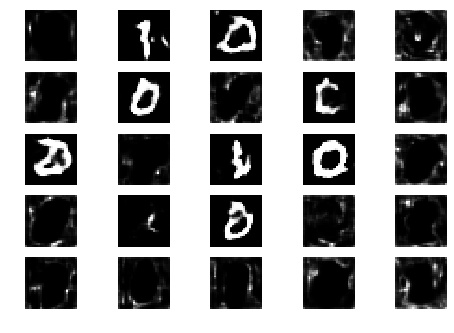

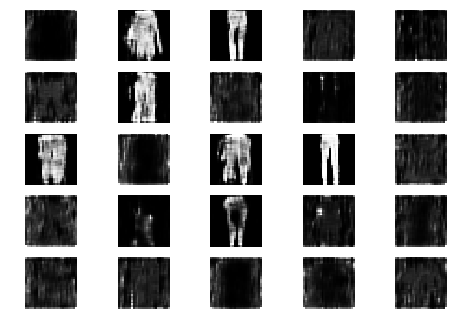

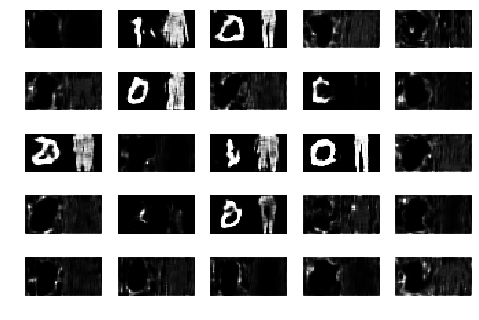

Epoch 1 Batch 1401/1875 [D loss: 0.603313, acc.: 62.50%] [G loss: 0.755622]
Epoch 1 Batch 1402/1875 [D loss: 0.745405, acc.: 56.25%] [G loss: 0.827089]
Epoch 1 Batch 1403/1875 [D loss: 0.600009, acc.: 75.00%] [G loss: 0.942406]
Epoch 1 Batch 1404/1875 [D loss: 0.661592, acc.: 46.88%] [G loss: 0.996704]
Epoch 1 Batch 1405/1875 [D loss: 0.620474, acc.: 59.38%] [G loss: 0.855702]
Epoch 1 Batch 1406/1875 [D loss: 0.618206, acc.: 62.50%] [G loss: 1.081129]
Epoch 1 Batch 1407/1875 [D loss: 0.533867, acc.: 78.12%] [G loss: 1.250505]
Epoch 1 Batch 1408/1875 [D loss: 0.627966, acc.: 62.50%] [G loss: 1.071199]
Epoch 1 Batch 1409/1875 [D loss: 0.668471, acc.: 43.75%] [G loss: 0.936451]
Epoch 1 Batch 1410/1875 [D loss: 0.641336, acc.: 65.62%] [G loss: 0.984049]
Epoch 1 Batch 1411/1875 [D loss: 0.458217, acc.: 81.25%] [G loss: 0.977135]
Epoch 1 Batch 1412/1875 [D loss: 0.630901, acc.: 59.38%] [G loss: 1.125251]
Epoch 1 Batch 1413/1875 [D loss: 0.613401, acc.: 71.88%] [G loss: 1.119007]
Epoch 1 Batc

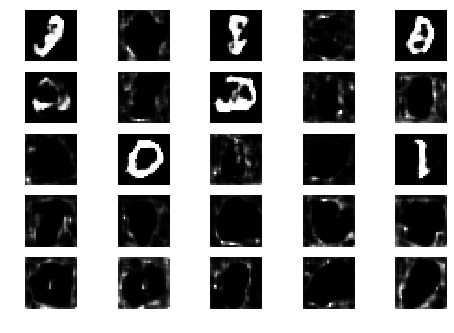

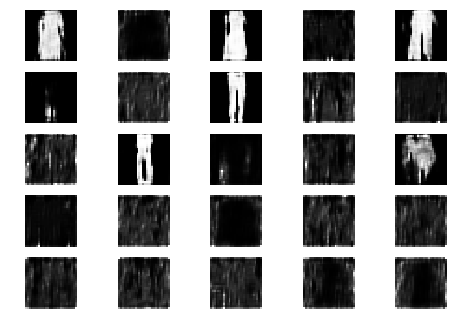

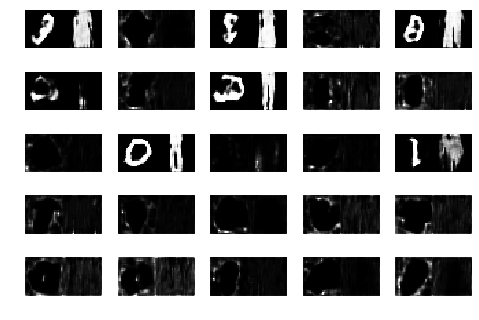

Epoch 1 Batch 1501/1875 [D loss: 0.684602, acc.: 59.38%] [G loss: 1.122595]
Epoch 1 Batch 1502/1875 [D loss: 0.721929, acc.: 53.12%] [G loss: 1.341176]
Epoch 1 Batch 1503/1875 [D loss: 0.660659, acc.: 56.25%] [G loss: 1.102910]
Epoch 1 Batch 1504/1875 [D loss: 0.671936, acc.: 78.12%] [G loss: 0.740027]
Epoch 1 Batch 1505/1875 [D loss: 0.723125, acc.: 59.38%] [G loss: 1.078339]
Epoch 1 Batch 1506/1875 [D loss: 0.764930, acc.: 37.50%] [G loss: 1.104624]
Epoch 1 Batch 1507/1875 [D loss: 0.627228, acc.: 68.75%] [G loss: 1.097335]
Epoch 1 Batch 1508/1875 [D loss: 0.607969, acc.: 65.62%] [G loss: 0.971233]
Epoch 1 Batch 1509/1875 [D loss: 0.644633, acc.: 65.62%] [G loss: 1.057055]
Epoch 1 Batch 1510/1875 [D loss: 0.868598, acc.: 50.00%] [G loss: 0.986771]
Epoch 1 Batch 1511/1875 [D loss: 0.589425, acc.: 71.88%] [G loss: 1.066558]
Epoch 1 Batch 1512/1875 [D loss: 0.761860, acc.: 50.00%] [G loss: 0.870405]
Epoch 1 Batch 1513/1875 [D loss: 0.828891, acc.: 34.38%] [G loss: 0.758454]
Epoch 1 Batc

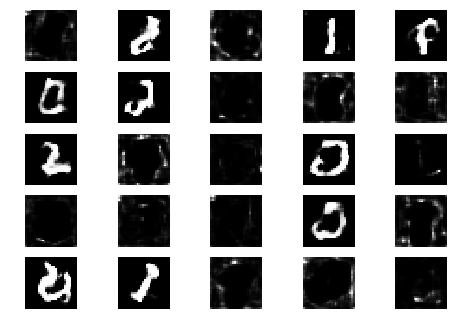

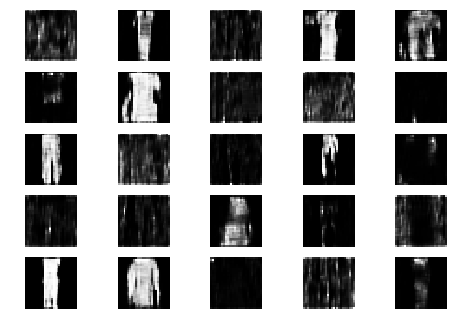

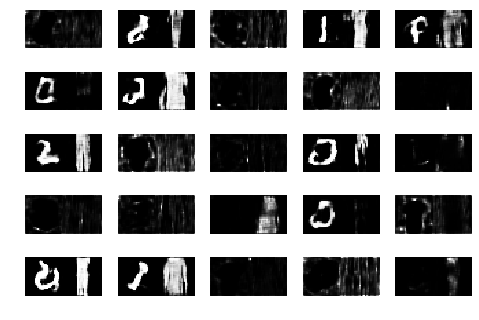

Epoch 1 Batch 1601/1875 [D loss: 0.562116, acc.: 84.38%] [G loss: 0.759750]
Epoch 1 Batch 1602/1875 [D loss: 0.742070, acc.: 50.00%] [G loss: 1.107609]
Epoch 1 Batch 1603/1875 [D loss: 0.638746, acc.: 53.12%] [G loss: 0.875987]
Epoch 1 Batch 1604/1875 [D loss: 0.634524, acc.: 56.25%] [G loss: 0.791765]
Epoch 1 Batch 1605/1875 [D loss: 0.715416, acc.: 59.38%] [G loss: 1.086865]
Epoch 1 Batch 1606/1875 [D loss: 0.628949, acc.: 40.62%] [G loss: 0.781049]
Epoch 1 Batch 1607/1875 [D loss: 0.915968, acc.: 31.25%] [G loss: 1.122585]
Epoch 1 Batch 1608/1875 [D loss: 0.777570, acc.: 53.12%] [G loss: 0.977059]
Epoch 1 Batch 1609/1875 [D loss: 0.560608, acc.: 75.00%] [G loss: 0.866898]
Epoch 1 Batch 1610/1875 [D loss: 0.693107, acc.: 62.50%] [G loss: 0.906681]
Epoch 1 Batch 1611/1875 [D loss: 0.655093, acc.: 50.00%] [G loss: 1.044016]
Epoch 1 Batch 1612/1875 [D loss: 0.720958, acc.: 68.75%] [G loss: 1.104943]
Epoch 1 Batch 1613/1875 [D loss: 0.607621, acc.: 71.88%] [G loss: 1.298005]
Epoch 1 Batc

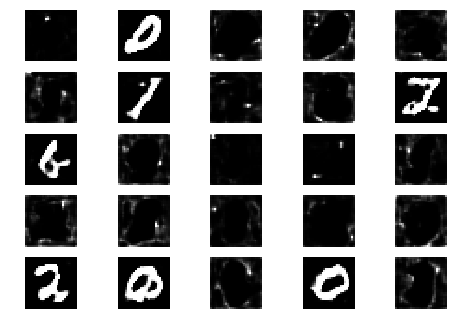

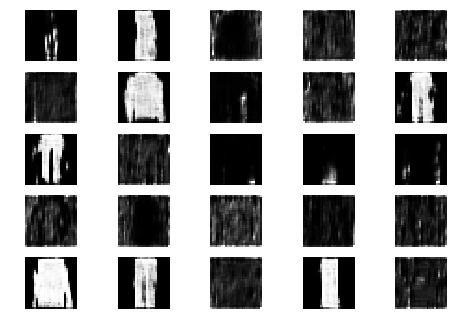

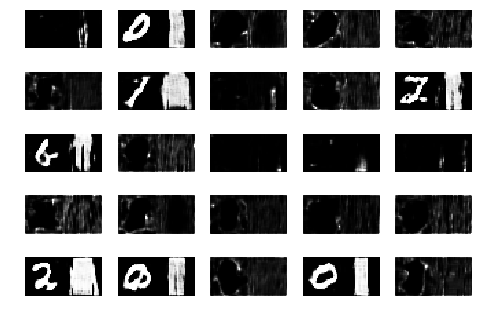

Epoch 1 Batch 1701/1875 [D loss: 0.523123, acc.: 71.88%] [G loss: 1.134663]
Epoch 1 Batch 1702/1875 [D loss: 1.021871, acc.: 34.38%] [G loss: 0.835266]
Epoch 1 Batch 1703/1875 [D loss: 0.859413, acc.: 40.62%] [G loss: 0.930706]
Epoch 1 Batch 1704/1875 [D loss: 0.747631, acc.: 50.00%] [G loss: 1.000647]
Epoch 1 Batch 1705/1875 [D loss: 0.668530, acc.: 59.38%] [G loss: 0.943182]
Epoch 1 Batch 1706/1875 [D loss: 0.835597, acc.: 37.50%] [G loss: 1.096037]
Epoch 1 Batch 1707/1875 [D loss: 0.630647, acc.: 68.75%] [G loss: 1.015236]
Epoch 1 Batch 1708/1875 [D loss: 0.679037, acc.: 50.00%] [G loss: 1.090399]
Epoch 1 Batch 1709/1875 [D loss: 0.592109, acc.: 68.75%] [G loss: 1.111751]
Epoch 1 Batch 1710/1875 [D loss: 0.923910, acc.: 37.50%] [G loss: 0.884923]
Epoch 1 Batch 1711/1875 [D loss: 0.577985, acc.: 59.38%] [G loss: 0.837978]
Epoch 1 Batch 1712/1875 [D loss: 0.521624, acc.: 75.00%] [G loss: 1.111364]
Epoch 1 Batch 1713/1875 [D loss: 0.778418, acc.: 46.88%] [G loss: 0.991186]
Epoch 1 Batc

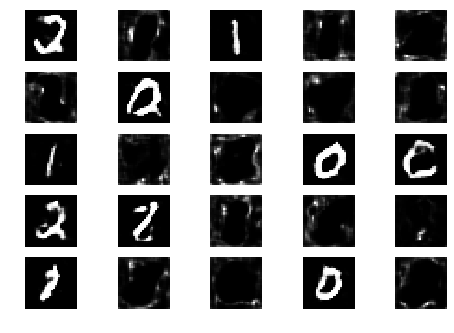

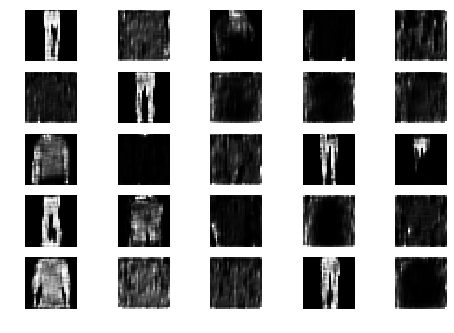

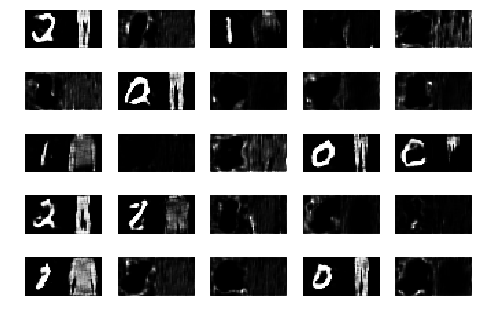

Epoch 1 Batch 1801/1875 [D loss: 0.798900, acc.: 50.00%] [G loss: 0.756158]
Epoch 1 Batch 1802/1875 [D loss: 0.957790, acc.: 25.00%] [G loss: 0.965477]
Epoch 1 Batch 1803/1875 [D loss: 0.697397, acc.: 68.75%] [G loss: 1.021758]
Epoch 1 Batch 1804/1875 [D loss: 0.682223, acc.: 56.25%] [G loss: 1.003142]
Epoch 1 Batch 1805/1875 [D loss: 0.614664, acc.: 68.75%] [G loss: 1.001601]
Epoch 1 Batch 1806/1875 [D loss: 0.581068, acc.: 78.12%] [G loss: 0.980190]
Epoch 1 Batch 1807/1875 [D loss: 0.724112, acc.: 46.88%] [G loss: 1.011330]
Epoch 1 Batch 1808/1875 [D loss: 0.669724, acc.: 56.25%] [G loss: 0.890278]
Epoch 1 Batch 1809/1875 [D loss: 0.488520, acc.: 81.25%] [G loss: 0.867252]
Epoch 1 Batch 1810/1875 [D loss: 0.786344, acc.: 50.00%] [G loss: 0.921434]
Epoch 1 Batch 1811/1875 [D loss: 0.499127, acc.: 78.12%] [G loss: 1.125420]
Epoch 1 Batch 1812/1875 [D loss: 0.777453, acc.: 53.12%] [G loss: 1.037376]
Epoch 1 Batch 1813/1875 [D loss: 0.635370, acc.: 68.75%] [G loss: 1.052268]
Epoch 1 Batc

In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=1, batch_size=32, save_interval=1, modeltotrain = 3)

In [0]:

generator1, generator2, discriminator, combined , mergedmodel = build_modelsNandriNEW( averagemode = 2 ,  loadpretrainedweights=True)




    
    

    


<class 'tensorflow.python.framework.ops.Tensor'>
(?, 28, 28, 1)
<class 'tensorflow.python.framework.ops.Tensor'>
(?, 28, 28, 1)
merge layers
(?, 28, 28, 1)
(?, 28, 28, 1)
(?, 28, 56, 1)


In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=1, batch_size=32, save_interval=1, modeltotrain = 3)

In [0]:
generator1, generator2, discriminator, combined , mergedmodel = build_modelsNandriNEW( averagemode = 3 ,  loadpretrainedweights=True)


In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=1, batch_size=64, save_interval=1, modeltotrain = 3)

In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=1, batch_size=64, save_interval=100, modeltotrain = 3)

In [0]:
plotamodel(combined, showdetails=False )
files.download('modelsmall.png')

In [0]:
!rm -rf generator1fminst.h5



In [0]:

generator1.save('generator1fminst.h5')



In [0]:
files.download('generator1fminst.h5')


In [0]:
generator1, generator2, discriminator, combined , mergedmodel = build_modelsNEW( averagemode = 2 ,  loadpretrainedweights=False)


In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=1, batch_size=32, save_interval=20, modeltotrain=3)

In [0]:
!rm -rf generator2fmnist.h5


In [0]:

generator2.save('generator2fmnist.h5')

In [0]:
!ls -al


In [0]:
files.download('generator2fmnist.h5')

In [0]:
##!wget https://github.com/rajagopalmotivate/try1/raw/master/generatorTrainedepoch2git.h5

In [0]:
!rm -rf generator1fminst.h5
!rm -rf generator2fminst.h5

In [0]:
!ls -all

In [0]:
!wget https://github.com/rajagopalmotivate/try1/raw/master/generator1fminst.h5

In [0]:
!wget https://github.com/rajagopalmotivate/try1/raw/master/generator2fminst.h5

In [0]:
generator1, generator2, discriminator, combined , mergedmodel = build_modelsNEW( averagemode = 3 ,  loadpretrainedweights=True)


In [0]:
plotamodel(combined, showdetails=False )
files.download('modelsmall.png')

In [0]:
plotamodel(combined, showdetails=True )
files.download('model.png')

In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1, modeltotrain=1)

In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1, modeltotrain=2)

In [0]:
generator1, generator2, discriminator, combined , mergedmodel = build_modelsNEW( averagemode = 3 ,  loadpretrainedweights=True)


In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1, modeltotrain=3)

In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1, modeltotrain=3)

In [0]:
plotamodel(combined)
files.download('model.png')

In [0]:
!rm -rf generatorTrainedepoch2.h5

generator1.save('generator1fminst.h5')

!rm -rf generator2Trainedepoch2.h5

generator2.save('generator2fminst.h5')


In [0]:
generator1 = generator1.load_weights('generator1fmnist.h5')


In [0]:
generator2 = generator2.load_weights('generator1fminst.h5')




In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1)

In [0]:
generator1.save('generatorTrained1epoch4.h5')

In [0]:
files.download('generator1fmnist.h5')

In [0]:
files.download('generator2fmnist.h5')

In [0]:
##files.download('discriminator1.h5')

In [0]:
##files.download('combined1.h5')

In [0]:
#generator1 = load_model('generator1.h5')
#discriminator1 = load_model('discriminator1.h5')
#combined1 = load_model('combined1.h5')

